# Neural network for regression

## The model

We will hope to approximate the function

\begin{equation}
    f(x,y) = -(x(x-1)+y(1-y)) + \frac{1}{2} \cos(xy)\sin(2x+y),
\end{equation}

in the range $[-3,3]$ using a neural network. The model has 2 branches, one with polynomial features, the other with oscillatory features. This motivates the network architecture used later.

In [2]:
import numpy as np

def func2approx(x,y):
    f = -(x * (x - 1) + y * (1 - y)) + 0.5 * np.cos(x * y) * np.sin(2 * x + y)
    return f

def generate_data(num_samples):
    X = np.random.rand(num_samples, 2)
    y = func2approx(X[:, 0], X[:, 1])
    return X, y

2025-11-16 21:05:00.407279: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-16 21:05:00.993113: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-16 21:05:03.008612: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/alex/projects/m1_work/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95:

float64
(1000, 2)
float64
(1000,)
Epoch 1/100


2025-11-16 21:05:05.991624: I external/local_xla/xla/service/service.cc:163] XLA service 0x726334006820 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-16 21:05:05.991664: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-11-16 21:05:06.026917: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-16 21:05:06.155084: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002


22/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0395 - mae: 0.1620

I0000 00:00:1763327106.839999    7308 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0351 - mae: 0.1543
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0314 - mae: 0.1429
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0314 - mae: 0.1458
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0308 - mae: 0.1444
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0314 - mae: 0.1461
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0317 - mae: 0.1463
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0323 - mae: 0.1476
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0316 - mae: 0.1474
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0307 - mae: 0.1436
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0312 - mae: 0.1444
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0306 - mae: 0.1438
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0306 - mae: 0.1434
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

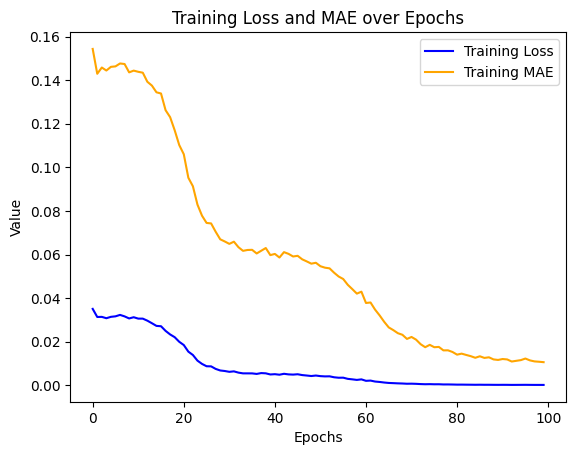

Test Loss: 0.0001980491797439754, Test MAE: 0.011136079207062721


In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD

model = Sequential([tf.keras.layers.Dense(5, activation="sigmoid", input_shape=(2,), kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=None)), 
                   tf.keras.layers.Dense(10, activation="sigmoid", kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=None)), 
                   tf.keras.layers.Dense(1, activation="linear", kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=None))])

model.compile(optimizer=Adam(learning_rate=0.01), loss="mean_squared_error", metrics=["mae"])
# Generate synthetic data
np.random.seed(0)
num_samples = 1000
X, y = generate_data(num_samples)
print(X.dtype)
print(X.shape)
print(y.dtype)
print(y.shape)
# Train the model
history = model.fit(X, y, epochs=100, batch_size=32, verbose=1)
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['mae'], label='Training MAE', color='orange')
plt.title('Training Loss and MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

# Generate test data
X_test, y_test = generate_data(200)
# Evaluate the model on test data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

## Scanning through hyperparameters

We will use optuna to scan through different values of hyperparameters. We will use 2 hidden layers with a linear activation output layer. We will vary the number of nodes in the hidden layers (5, 10, 25, 50, 100), the activation function for each hidden layer (sigmoid, ReLU, tanh, CeLU, GELU, ELU, leaky ReLU), random weight range (0.05, 0.5, 5, 50), optimiser (Adam, SGD, SGD with momentum, RMSProp, AdaGrad), batch size (2, 4, 8, 16, 32, 64), epochs (2, 4, 8, 16, 32, 64, 128).

In [5]:
import optuna
from optuna.visualization import plot_optimization_history, plot_intermediate_values, plot_contour, plot_param_importances
from optuna.trial import TrialState

def objective(trial):

    model = Sequential([
        tf.keras.layers.Dense(trial.suggest_categorical('units1', [100]), 
                              activation=trial.suggest_categorical('activation1', ['leaky_relu']), 
                              input_shape=(2,), 
                              kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=None)),
        tf.keras.layers.Dense(trial.suggest_categorical('units2', [100]), 
                              activation=trial.suggest_categorical('activation2', ['gelu']), 
                              kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=None)),
        tf.keras.layers.Dense(1, activation="linear", 
                              kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=None))
    ])

    X_train, y_train = generate_data(800)

    optimizer = Adam(learning_rate=0.01)

    
    model.compile(optimizer=optimizer, loss="mean_squared_error", metrics=["mae"])
    model.fit(X_train, y_train, 
              epochs=trial.suggest_categorical('epochs', [128]), 
              batch_size=trial.suggest_categorical('batch_size', [32]), 
              verbose=0)

    X_val, y_val = generate_data(200)

    for step in range(1, 11):
        intermediate_value = model.evaluate(X_val, y_val, verbose=0)[1]
        trial.report(intermediate_value, step)

    if trial.should_prune():
            raise optuna.TrialPruned()

    val_mae = model.evaluate(X_val, y_val, verbose=0)[1]
    return val_mae

study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=100, timeout=600)
pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])
print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2025-11-16 21:17:05,079] A new study created in memory with name: no-name-a6d320ce-6de4-4675-a051-59212bcc72ec
/home/alex/projects/m1_work/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[I 2025-11-16 21:17:21,842] Trial 0 finished with value: 0.003043358912691474 and parameters: {'units1': 100, 'activation1': 'leaky_relu', 'units2': 100, 'activation2': 'gelu', 'epochs': 128, 'batch_size': 32}. Best is trial 0 with value: 0.003043358912691474.
[I 2025-11-16 21:17:35,856] Trial 1 finished with value: 0.004275234881788492 and parameters: {'units1': 100, 'activation1': 'leaky_relu', 'units2': 100, 'activation2': 'gelu', 'epochs': 128, 'batch_size': 32}. Best is trial 0 with value: 0.003043358912691474.
[I 2025-11-16 21

KeyboardInterrupt: 

## Polynomial features

Try modifying the inputs by adding the features $(x^2,xy,y^2)$. I wonder what will happen now.

float64
(1000, 5)
float64
(1000,)
Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.4507 - mae: 0.4207
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mae: 0.0616
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.2855e-04 - mae: 0.0220
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5170e-04 - mae: 0.0143
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4589e-04 - mae: 0.0121
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7199e-04 - mae: 0.0100
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5195e-04 - mae: 0.0095
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1143e-04 - mae: 0.0081
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.1419e-05 - mae: 0.0072
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.6445e-05 - mae: 0.0067
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.1938e-05 - mae: 0.0064
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

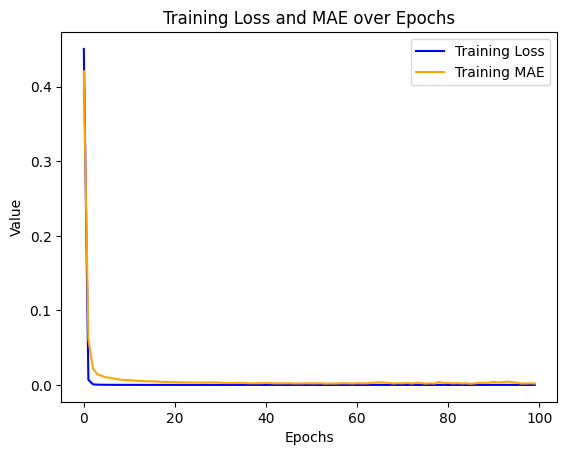

Test Loss: 6.401832251867745e-06, Test MAE: 0.0018565786303952336


In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model = Sequential([tf.keras.layers.Dense(100, activation="leaky_relu", input_shape=(5,), kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=None)), 
                   tf.keras.layers.Dense(100, activation="gelu", kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=None)), 
                   tf.keras.layers.Dense(1, activation="linear", kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=None))])

model.compile(optimizer=Adam(learning_rate=0.01), loss="mean_squared_error", metrics=["mae"])
# Generate synthetic data
np.random.seed(0)
num_samples = 1000
X, y = generate_data(num_samples)
X_modified = np.zeros((X.shape[0], 5))
X_modified[:, 0] = X[:, 0]
X_modified[:, 1] = X[:, 1]
X_modified[:, 2] = X[:, 0] ** 2
X_modified[:, 3] = X[:, 0] * X[:, 1]
X_modified[:, 4] = X[:, 1] ** 2
X = X_modified
print(X.dtype)
print(X.shape)
print(y.dtype)
print(y.shape)
# Train the model
history = model.fit(X, y, epochs=100, batch_size=32, verbose=1)
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['mae'], label='Training MAE', color='orange')
plt.title('Training Loss and MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

# Generate test data
X_test, y_test = generate_data(200)
X_test_modified = np.zeros((X_test.shape[0], 5))
X_test_modified[:, 0] = X_test[:, 0]
X_test_modified[:, 1] = X_test[:, 1]
X_test_modified[:, 2] = X_test[:, 0] ** 2
X_test_modified[:, 3] = X_test[:, 0] * X_test[:, 1]
X_test_modified[:, 4] = X_test[:, 1] ** 2
X_test = X_test_modified
# Evaluate the model on test data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

## Funky network architecture

Input layer passes to three dense layers, one of which is passed to a sine layer, another of which is passed to a cosine layer. The outputs of these two layers are concatenated with the remaining dense layer before being passed through another dense layer before the output is calculated.

float64
(1000, 5)
float64
(1000,)
Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3410 - mae: 0.4125
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0317 - mae: 0.1466
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0264 - mae: 0.1322
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0206 - mae: 0.1183
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mae: 0.0746
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030 - mae: 0.0406
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.6149e-04 - mae: 0.0197
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5935e-04 - mae: 0.0147
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8408e-04 - mae: 0.0130
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5073e-04 - mae: 0.0124
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1714e-04 - mae: 0.0115
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9

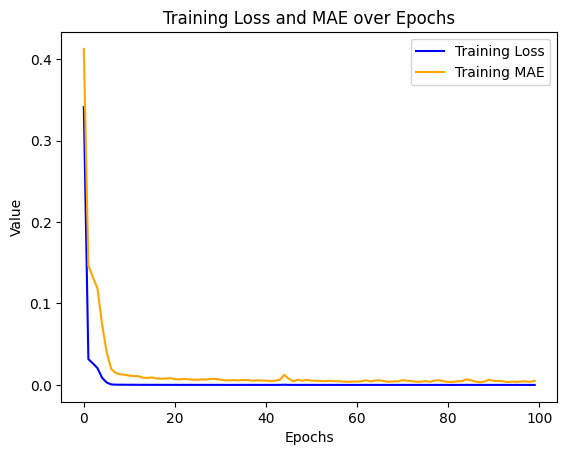

Test Loss: 0.00034926264197565615, Test MAE: 0.016953233629465103


In [11]:
input = tf.keras.layers.Input(shape=(5,))
dense1 = tf.keras.layers.Dense(64, activation='relu')(input)
dense2 = tf.keras.layers.Dense(64, activation='relu')(input)
dense3 = tf.keras.layers.Dense(64, activation='relu')(input)
sine_layer = tf.keras.layers.Lambda(lambda x: tf.sin(x))(dense1)
cosine_layer = tf.keras.layers.Lambda(lambda x: tf.cos(x))(dense2)
concatenated = tf.keras.layers.concatenate([sine_layer, cosine_layer, dense3])
dense4 = tf.keras.layers.Dense(64, activation='relu')(concatenated)
output = tf.keras.layers.Dense(1, activation='linear')(dense4)
model = tf.keras.Model(inputs=input, outputs=output)

model.compile(optimizer=Adam(learning_rate=0.01), loss="mean_squared_error", metrics=["mae"])
# Generate synthetic data
np.random.seed(0)
num_samples = 1000
X, y = generate_data(num_samples)
X_modified = np.zeros((X.shape[0], 5))
X_modified[:, 0] = X[:, 0]
X_modified[:, 1] = X[:, 1]
X_modified[:, 2] = X[:, 0] ** 2
X_modified[:, 3] = X[:, 0] * X[:, 1]
X_modified[:, 4] = X[:, 1] ** 2
X = X_modified
print(X.dtype)
print(X.shape)
print(y.dtype)
print(y.shape)
# Train the model
history = model.fit(X, y, epochs=100, batch_size=32, verbose=1)
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['mae'], label='Training MAE', color='orange')
plt.title('Training Loss and MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

# Generate test data
X_test, y_test = generate_data(200)
X_test_modified = np.zeros((X_test.shape[0], 5))
X_test_modified[:, 0] = X_test[:, 0]
X_test_modified[:, 1] = X_test[:, 1]
X_test_modified[:, 2] = X_test[:, 0] ** 2
X_test_modified[:, 3] = X_test[:, 0] * X_test[:, 1]
X_test_modified[:, 4] = X_test[:, 1] ** 2
X_test = X_test_modified
# Evaluate the model on test data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')